# Fractures - Probability Distribution Function

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import mpmath
import os

In [2]:
# Set parameters
seed = 0
N = 1000

# Create random number generator
RNG = np.random.default_rng(seed)

# Create directory for saved figures
figpath = 'img/'
if not os.path.exists(figpath): 
    os.makedirs(figpath)

## Uniform

$
f(x) = 
\begin{cases}
    \frac{1}{b-a} & \text{for } a \le x \le b, \\[8pt]
    0 & \text{for } x < a \ \text{ or } \ x > b.
\end{cases}
$

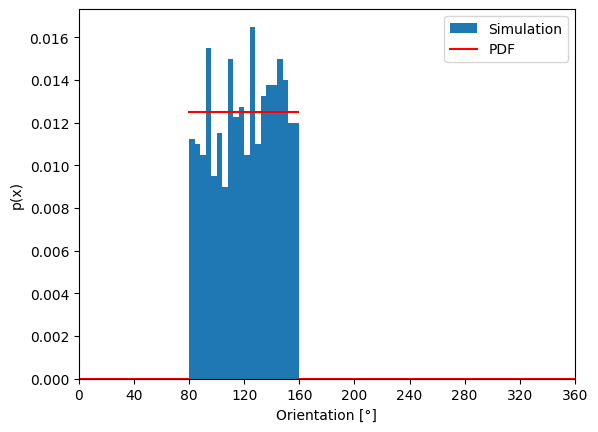

In [3]:
# Set angle parameters
theta_min = 80
theta_max = 160
xlim = [0, 360]
xticks = range(0, 361, 40)

# Draw random law
out = RNG.uniform(theta_min, theta_max, size=N)

# Create figure
fig, ax = plt.subplots()
ax.set_xlim(xlim)
ax.set_xticks(xticks)

# Plot histogram of the data
n, bins, patches = ax.hist(out,
                           bins=90,
                           range=xlim,
                           density=True,
                           label='Simulation')

# Plot probability density function
x_0 = np.arange(0, theta_min, 1)
x_n = np.arange(theta_min, theta_max, 1)
x_1 = np.arange(theta_max, 360+1, 1)
y_0 = [0] * len(x_0)
y_n = [(1 / (theta_max - theta_min))] * len(x_n)
y_1 = [0] * len(x_1)
ax.plot(x_0, y_0, c='r', label='PDF')
ax.plot(x_n, y_n, c='r')
ax.plot(x_1, y_1, c='r')

# Misc
ax.set_xlabel('Orientation [°]', fontsize=10)
ax.set_ylabel('p(x)', fontsize=10)
ax.legend()
fig.savefig(fname=figpath+'PDF_uniform', bbox_inches='tight')

## Von Mises

$
f(x \mid \mu,\kappa) = \frac{e^{\kappa\cos(x - \mu)}}{2 \pi I_{0}(\kappa))}
$

In [4]:
def calculate_mu(theta_min, theta_max):
    """"""
    mu = (theta_min + theta_max) / 2
    return mu
    
def calculate_kappa(theta_max, mu):
    """"""
    std = (theta_max - mu) / 3
    kappa = solve_kappa(std)
    return kappa

def solve_kappa(std):
    """TODO"""

    def func(kappa):
        a = std**2 - 1
        b = mpmath.besseli(1, kappa) / mpmath.besseli(0, kappa)
        return a + b
    kappa = mpmath.findroot(func, 0)
    return kappa

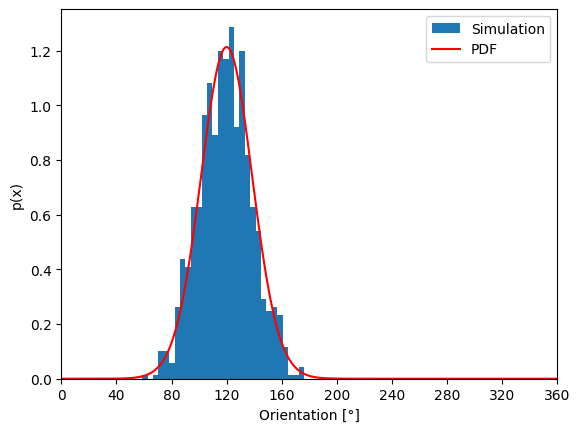

In [5]:
# Set angle parameters
theta_min = 80
theta_max = 160
theta_min_rad = np.radians(theta_min)
theta_max_rad = np.radians(theta_max)
xlim = [0, 2*np.pi]

# Draw random law
mu = calculate_mu(theta_min_rad, theta_max_rad)
kappa = calculate_kappa(theta_max_rad, mu)
out = RNG.vonmises(mu, kappa, size=N)

# Create figure
fig, ax = plt.subplots()
ax.set_xlim(xlim)
xticks = np.linspace(0, 2*np.pi, 10)
xlabels = np.linspace(0, 360, 10).astype(int)
ax.set_xticks(ticks=xticks, labels=xlabels)

# Plot histogram of the data
n, bins, patches = ax.hist(out,
                           bins=90,
                           density=True,
                           label='Simulation')

# Plot probability density function
x = np.arange(0, 2*np.pi, (1/360)*(2*np.pi))
y = np.exp(np.float_(kappa) * np.cos(x - mu)) / (2 * np.pi * np.float_(mpmath.besseli(0, kappa)))
ax.plot(x, y, c='r', label='PDF')

# Misc
ax.set_xlabel('Orientation [°]', fontsize=10)
ax.set_ylabel('p(x)', fontsize=10)
ax.legend()
fig.savefig(fname=figpath+'PDF_vonmises', bbox_inches='tight')

In [6]:
# Polar hist
# https://dlwhittenbury.github.io/ds-1-sampling-and-visualising-the-von-mises-distribution.html

## Truncated Power Law

$
f(x \mid x_{min}, x_{max}) = \frac{\left ( \alpha - 1 \right ) \cdot x^{-\alpha }}{x_{min}^{- \alpha + 1} - x_{max}^{- \alpha + 1}}
$

In [7]:
def truncated_power_law(value_min, value_max, alpha, size):
    """TODO"""
    palpha = (1 - alpha)
    invpalpha = 1 / palpha
    fmina = value_min**palpha
    frangea = value_max**palpha - fmina
    u = RNG.uniform(size=size)
    out = (fmina + u * frangea)**invpalpha
    return out

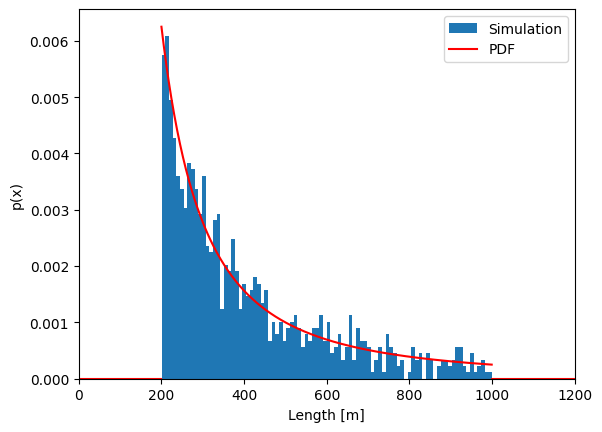

In [8]:
# Set length parameters
alpha = 2.0
value_min = 200.0
value_max = 1000.0

# Draw random law
palpha = (1 - alpha)
x_lim = 1200
out = truncated_power_law(value_min, value_max, alpha, size=N)

# Create figure
fig, ax = plt.subplots()
ax.set_xlim((0, x_lim))

# Plot histogram of the data
n, bins, patches = ax.hist(out,
                           bins=90,
                           density=True,
                           label='Simulation')

# Plot probability density function
x_0 = np.arange(0, value_min, 1)
x_n = np.arange(value_min, value_max, 1)
x_1 = np.arange(value_max, x_lim, 1)
y_0 = [0] * len(x_0)
y_n = (-palpha * np.power(x_n, -alpha)) / (np.power(value_min, palpha) - np.power(value_max, palpha))
y_1 = [0] * len(x_1)
ax.plot(x_0, y_0, c='r', label='PDF')
ax.plot(x_n, y_n, c='r')
ax.plot(x_1, y_1, c='r')

# Misc
ax.set_xlabel('Length [m]', fontsize=10)
ax.set_ylabel('p(x)', fontsize=10)
ax.legend()
fig.savefig(fname=figpath+'PDF_power', bbox_inches='tight')

## Poisson distribution

$ p(k) = P(X = k) = \frac{\lambda_{i}^{k}}{k!} \cdot e^{-\lambda_{i}} $

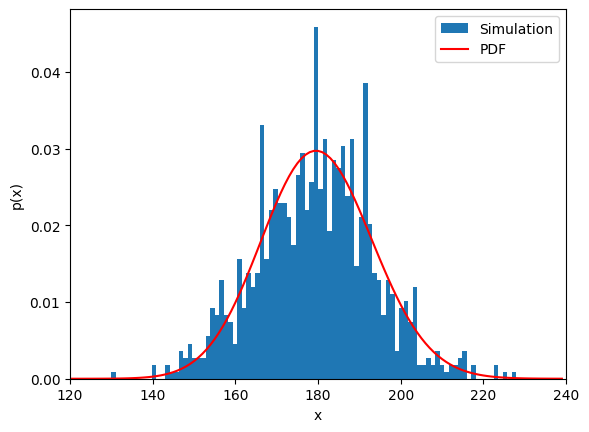

In [9]:
# Set parameters
lam = 180
x_0 = lam - lam/3
x_1 = lam + lam/3
xlim = [x_0, x_1]

# Draw random law
out = RNG.poisson(lam=lam, size=N)

# Create figure
fig, ax = plt.subplots()
ax.set_xlim(xlim)

# Plot histogram of the data
n, bins, patches = ax.hist(out,
                           bins=90,
                           density=True,
                           label='Simulation')

# Plot probability density function
x = np.arange(x_0, x_1, 1, dtype=int)
lam_list = [lam] * len(x)
xpow = list(map(mpmath.power, lam_list, x))
kfac = list(map(mpmath.factorial, x))
div = list(map(mpmath.fdiv, xpow, kfac))
elam = mpmath.exp(-lam)
y = [elem * elam for elem in div]
ax.plot(x, y, c='r', label='PDF')

# Misc
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('p(x)', fontsize=10)
ax.legend()
fig.savefig(fname=figpath+'PDF_poisson', bbox_inches='tight')